In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.signal
import scipy.integrate
import numpy as np

In [31]:
# Wave equation. 2nd order ODE.
# u_tt = c^2 u_xx
# u_tt = c^2 u_xx + f(x,t)
# split into two 1st order ODEs
# u_t = u'
# u_t' = u'' = c^2 u_xx
def f(y, t, c):
    u, u_t = y.reshape(2, -1).copy()

    # Boundary conditions signal generator
    phase = 2*np.pi*t*.01
    envelope = np.exp(min(0, 100-t))
    u[0] = np.sin(phase)*envelope
    u_t[0] = np.cos(phase) * 2*np.pi*.01*envelope

    dudt = u_t
    d2udx2 = np.pad(np.diff(u, 2), 1, 'constant')
    d2udt2  = c**2 * d2udx2
    dydt = np.concatenate([dudt, d2udt2])
    return dydt

In [36]:
#test = linspace(0, 1, 1000)
#plot(np.exp(min(0, 100-test)))

Text(0.5, 1.0, 'Speed of sound from transducer to tissue to kidney')

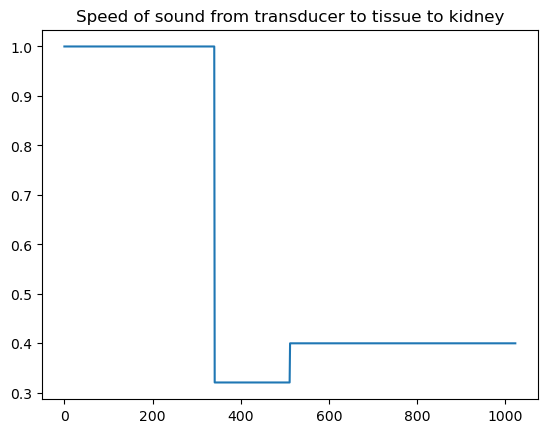

In [64]:
#number of points in space to plot
nx = 1024 
c = np.ones(nx, dtype=np.float64)
speedInTissue = 1540/4800
#from hw FPCB matching layer speed = 2333 m/s
speedMatchingLayer = 2333/4800
speedKidney = 1561/4800

skinBarrier = nx//3
kidneyBarrier = nx//2
matchingBarrier = skinBarrier - int(100*speedMatchingLayer*.5) 
#COMMENT OUT FOR NO MATCHING LAYER
#c[matchingBarrier:] = speedMatchingLayer 
c[skinBarrier:] = speedInTissue 
c[kidneyBarrier:] = .4

t = np.arange(0,2500,15)
y0 = np.zeros((2,nx), dtype=np.float64)
y0[1,0] = 1
y = scipy.integrate.odeint(f, y0.ravel(), t, args=(c,))
plot(c)
title('Speed of sound from transducer to tissue to kidney')

In [16]:
from ipywidgets import interact

In [62]:
@interact(i=(0,len(y)-1, 2))
def p(i):
    s = y[i]
    u, u_t = s.reshape(2, -1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
    #plot to upper subplot
    ax1.plot(u)
    #plot(u)
    #ax1.vlines(matchingBarrier, -1, 1, color='k', linestyle='--')
    ax1.vlines(skinBarrier, -1, 1, color='k', linestyle='--')
    ax1.vlines(kidneyBarrier, -1, 1, color='k', linestyle='--')

    ax1 = Axes(fig, [.1,.1,.8,.8])
    #plot through index i of t to lower subplot
    ax2.plot(t[:i], y[:,20][:i])
    #set x limit to max len(y) - 1
    #ax2.set_xlim([0, len(t)])
    ylim([-2,2])
    ax1.set_title(f'{t[i]}s')
    
    


interactive(children=(IntSlider(value=82, description='i', max=166, step=2), Output()), _dom_classes=('widget-…

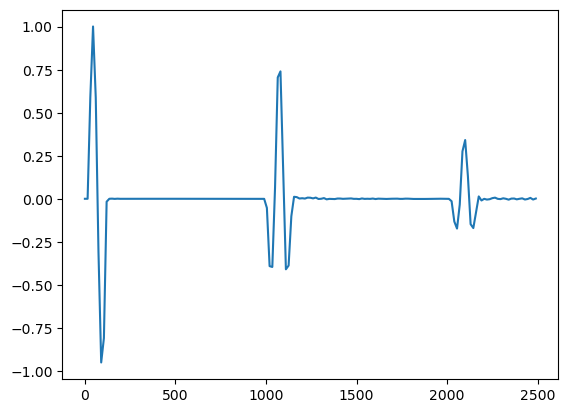

In [18]:
plot(t, y[:, 20])

In [8]:
print(len(t))

167
